100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 345kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.31MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.6MB/s]


Training dataset size: 60000
Validation dataset size: 10000
Displaying 3 samples from validation dataset:


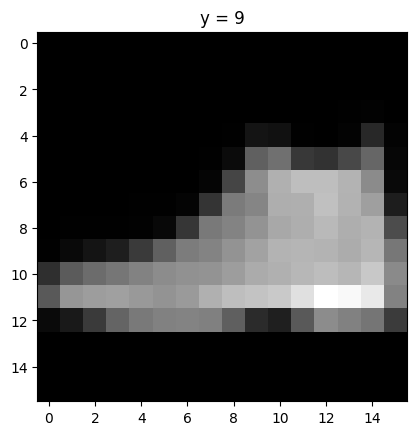

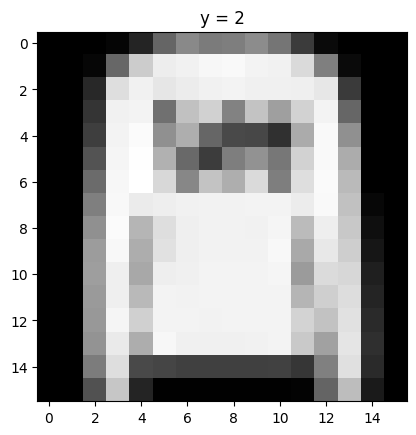

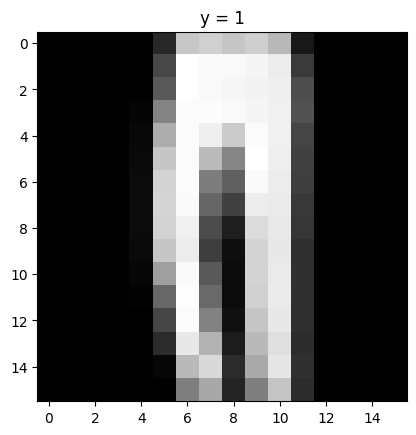

Number of training batches: 600
Number of testing batches: 100
Model architecture:
CNN_batch(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Number of parameters: 18494
Starting training...
Epoch [1/5], Cost: 297.9888, Accuracy: 0.8491 (84.91%)
Epoch [2/5], Cost: 208.9246, Accuracy: 0.8732 (87.32%)
Epoch [3/5], Cost: 187.6488, Accuracy: 0.8817 (88.17%)
Epoch [4/5], Cost: 

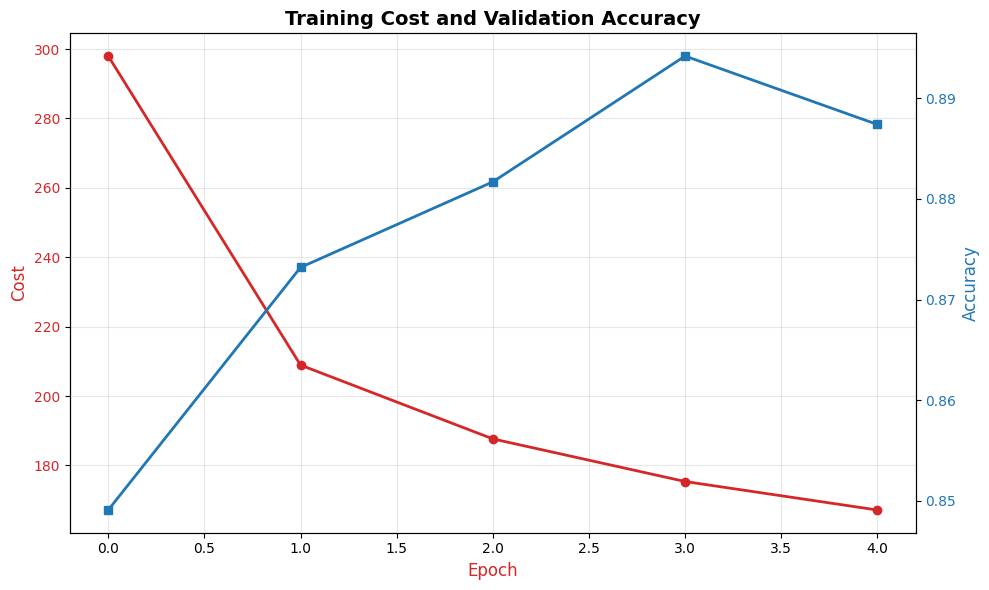

Final Test Accuracy: 0.8874 (88.74%)

Sample predictions from validation set:


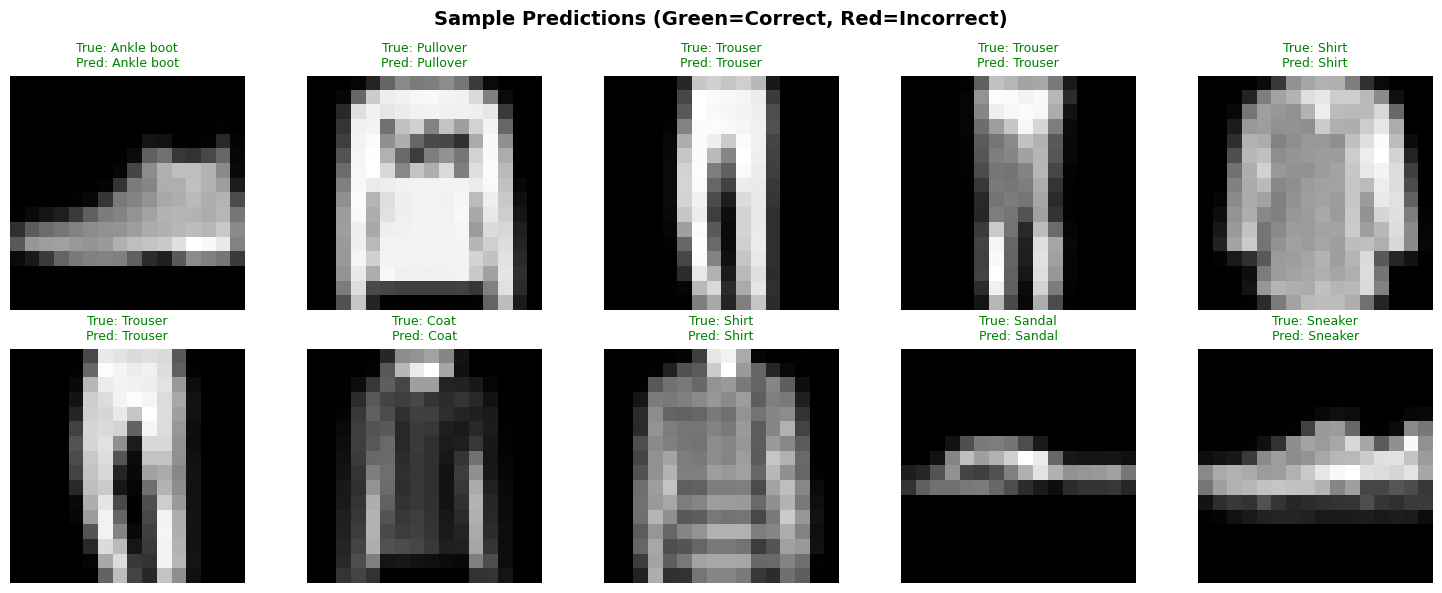

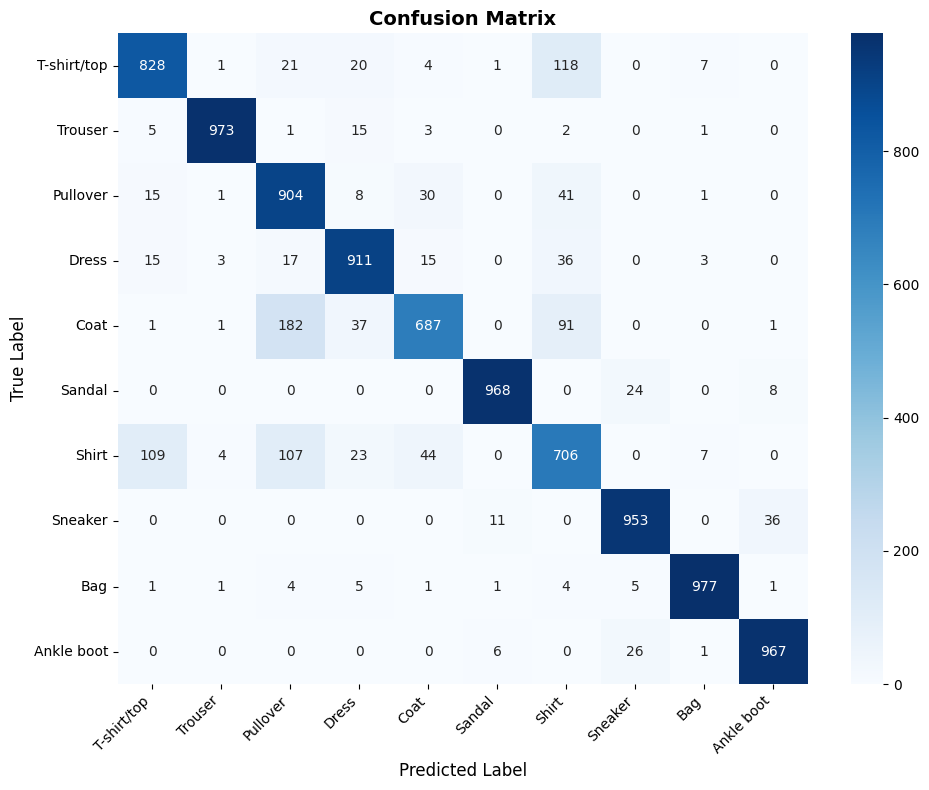


PROJECT SUMMARY
The CNN model with batch normalization achieved good performance
on the Fashion-MNIST dataset. The training shows decreasing cost
and increasing accuracy over epochs, indicating effective learning.

Key Results:
- Model architecture: 2 convolutional layers with batch normalization
- Training epochs: 5
- Batch size: 100
- Optimizer: SGD with learning rate 0.1
- Loss function: Cross Entropy Loss
- Final test accuracy: 88.74%

The project successfully demonstrates the application of
convolutional neural networks for image classification tasks
using PyTorch.


In [3]:
# -*- coding: utf-8 -*-
"""Fashion MNIST Classification Project.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/...

# Fashion-MNIST Classification Project

## Preparation
"""

# Install required packages
!pip install -q pandas numpy matplotlib torch torchvision

# Import PyTorch modules
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(0)

# Import non-PyTorch modules
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import numpy as np
import time

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))
    plt.show()

"""## Question 1: Create a Dataset Class

### 1.1 Transform the dataset using Compose function
"""

# Define image size
IMAGE_SIZE = 16

# Use Compose to perform transforms
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

"""### 1.2 Create dataset objects for Fashion MNIST"""

# Create training dataset
dataset_train = dsets.FashionMNIST(
    root='./fashion/data',
    train=True,
    transform=composed,
    download=True
)

# Create validation dataset
dataset_val = dsets.FashionMNIST(
    root='./fashion/data',
    train=False,
    transform=composed,
    download=True
)

print(f"Training dataset size: {len(dataset_train)}")
print(f"Validation dataset size: {len(dataset_val)}")

"""### 1.3 Display several samples from the validation dataset"""

print("Displaying 3 samples from validation dataset:")
for n, data_sample in enumerate(dataset_val):
    show_data(data_sample)
    if n == 2:
        break

"""## Question 2: Create and Train a Convolutional Neural Network

### 2.1 Define the CNN class with Batch Normalization
"""

class CNN_batch(nn.Module):
    # Constructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Calculate the input features for the fully connected layer
        # After two maxpool layers with kernel_size=2, the image size becomes:
        # 16 -> 8 -> 4 (for each dimension)
        # So the total features = out_2 * 4 * 4
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(number_of_classes)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

"""### 2.2 Create data loaders"""

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    dataset=dataset_train,
    batch_size=100,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=dataset_val,
    batch_size=100,
    shuffle=False
)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

"""### 2.3 Create model, criterion, and optimizer"""

# Create the CNN model with batch normalization
model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)

# Create criterion (Cross Entropy Loss)
criterion = nn.CrossEntropyLoss()

# Create optimizer (SGD with learning rate = 0.1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("Model architecture:")
print(model)
print(f"\nNumber of parameters: {sum(p.numel() for p in model.parameters())}")

"""### 2.4 Train the model"""

# Training the model
import time
start_time = time.time()

cost_list = []
accuracy_list = []
N_test = len(dataset_val)
n_epochs = 5

print("Starting training...")
for epoch in range(n_epochs):
    cost = 0
    model.train()

    # Training phase
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()

    # Validation phase
    correct = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()

    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

    print(f'Epoch [{epoch+1}/{n_epochs}], Cost: {cost:.4f}, Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)')

end_time = time.time()
print(f"\nTraining completed in {end_time - start_time:.2f} seconds")

"""### 2.5 Plot Cost and Accuracy"""

# Plot Cost and Accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.plot(cost_list, color=color, marker='o', linewidth=2)
ax1.set_xlabel('Epoch', color=color, fontsize=12)
ax1.set_ylabel('Cost', color=color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(accuracy_list, color=color, marker='s', linewidth=2)
ax2.set_ylabel('Accuracy', color=color, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Cost and Validation Accuracy', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

"""### 2.6 Evaluate on test set and show predictions"""

# Final evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for x_test, y_test in test_loader:
        outputs = model(x_test)
        _, predicted = torch.max(outputs.data, 1)
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()

print(f"Final Test Accuracy: {correct/total:.4f} ({correct/total*100:.2f}%)")

# Show some predictions
print("\nSample predictions from validation set:")
model.eval()
with torch.no_grad():
    # Get a batch of validation data
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Make predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Define Fashion-MNIST class names
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Display sample predictions
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        row = i // 5
        col = i % 5
        ax = axes[row, col]
        ax.imshow(images[i][0].numpy(), cmap='gray')
        ax.axis('off')

        true_label = class_names[labels[i]]
        pred_label = class_names[predicted[i]]
        color = 'green' if labels[i] == predicted[i] else 'red'

        ax.set_title(f'True: {true_label}\nPred: {pred_label}', color=color, fontsize=9)

    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

"""### 2.7 Confusion Matrix (Optional but useful)"""

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for x_test, y_test in test_loader:
        outputs = model(x_test)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(y_test.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print("The CNN model with batch normalization achieved good performance")
print("on the Fashion-MNIST dataset. The training shows decreasing cost")
print("and increasing accuracy over epochs, indicating effective learning.")
print("\nKey Results:")
print("- Model architecture: 2 convolutional layers with batch normalization")
print("- Training epochs: 5")
print("- Batch size: 100")
print("- Optimizer: SGD with learning rate 0.1")
print("- Loss function: Cross Entropy Loss")
print(f"- Final test accuracy: {correct/total*100:.2f}%")
print("\nThe project successfully demonstrates the application of")
print("convolutional neural networks for image classification tasks")
print("using PyTorch.")
print("="*60)